<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/9.1_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning with Python
**Machine Learning** - it is the way an machine learning model can perform the tasks of humans or at least help make the process faster – It is the sub-field of computer science that gives “computers the ability to learn without being explicitly programmed”.



#### Regression
**Regression** - Regression is used to predict a continuous value using some other variables. It comprises of 2 types of variables:
- **Dependent Variable**: Can be seen as the state/ target/ final goal we study and try to predict – they are conventionally shown by ‘y’ – should be continuous and cannot be a discrete value
- One or more **Independent/ Explanatory Variable**: can be seen as the causes of those states – they are conventionally shown by ‘x’ – can be measured on either a categorical or continuous measurement scale

A regression model relates the dependent variable (y) to a function of the independent variable (x)

**Regression model**: We use regression to build a regression estimation model which is used to predict the expected value of a new or unknown variable.

There are 2 types of regression models:
* **Simple Regression**: It refers to when one independent variable is used to estimate a dependent variable – It can be linear or non-linear regression where linearity of regression is based on the nature of relationship between independent and dependent variables
* **Multiple Regression**: When multiple independent variables are present, the process is called multiple linear regression. It is a method of predicting a continuous variable and uses multiple variables called independent variables or predictors that best predict the value of the target/ dependent variable. The target value (y) is a linear combination of independent variables (X). It is the extension of simple linear regression model



In [1]:
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np


In [2]:
# Extract Data
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Data Exploration
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# select specific features to further explore
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


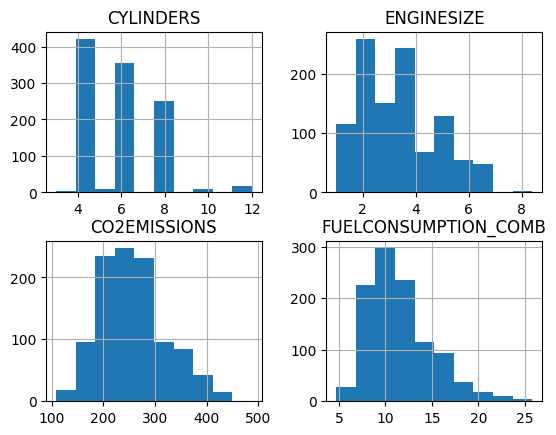

In [5]:
# plot each of these features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

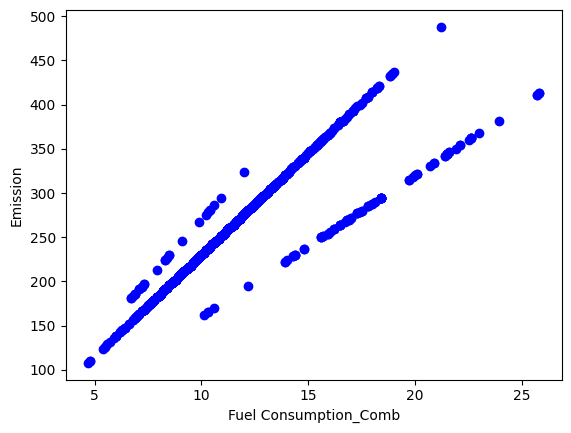

In [6]:
# plot each of these features against emission to see how linear their relationship is
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption_Comb')
plt.ylabel('Emission')
plt.show()

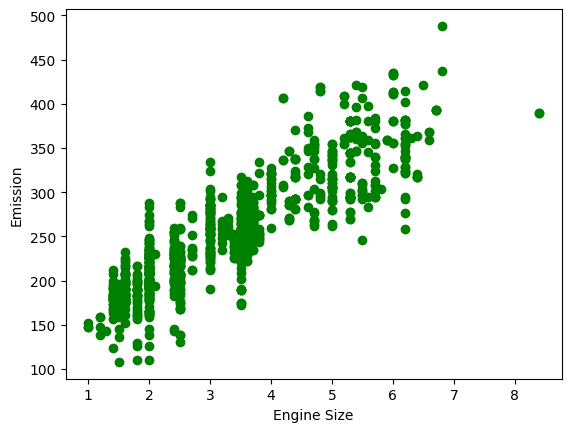

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

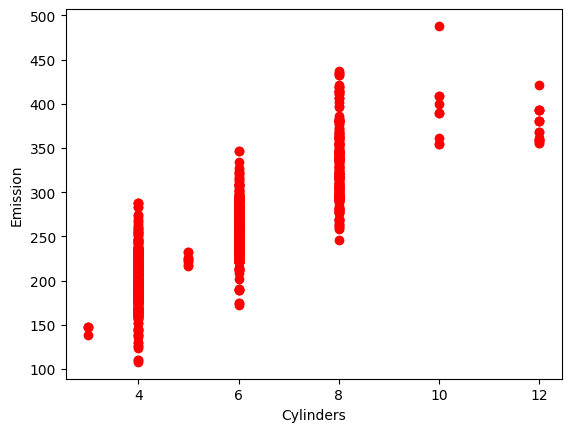

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

### **Simple Linear Regression**

**Creating Train and Test dataset**
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

In [9]:
# split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[msk]

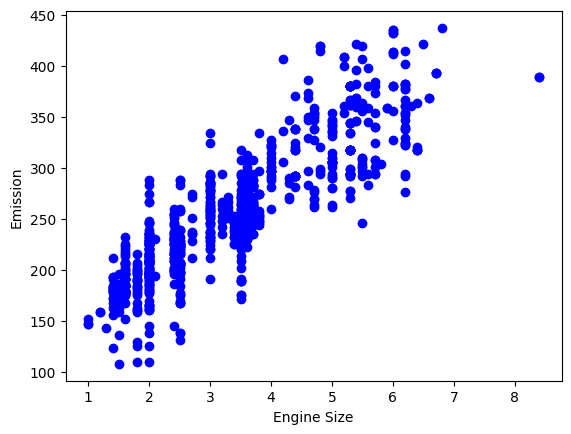

In [10]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [11]:
# Modeling
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)
# the Coefficient and Intercept in the simple linear regression, are the parameters for the fit line

Coefficients: [[39.19171863]]
Intercept: [125.08562506]


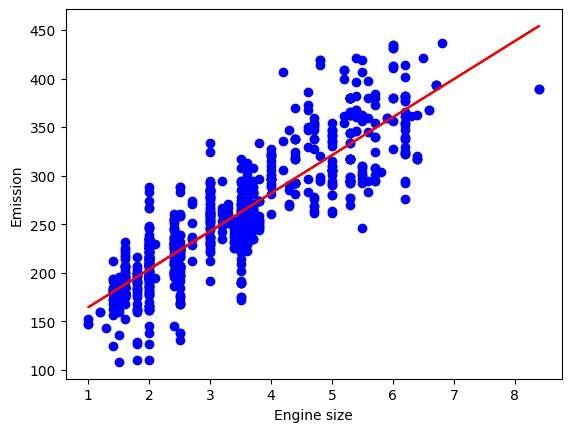

In [12]:
#plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.


In [13]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.60
Residual sum of squares (MSE): 963.73
R2-score: 0.76


**Exercise**
See what the evaluation metrics are if we trained a regression model using the FUELCONSUMPTION_COMB feature.

In [14]:
reg = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x1, train_y1)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [[16.40479119]]
Intercept: [66.58033571]


In [15]:
test_x1 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])
test_y1_ = reg.predict(test_x1)

In [16]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_ - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_ - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y1, test_y1_) )

Mean absolute error: 19.91
Residual sum of squares (MSE): 806.51
R2-score: 0.80


### **Multiple Linear Regression**

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
Y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (X,Y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.04470259  7.11142185  9.87235215]]


In [28]:
# Prediction
Y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
X = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
Y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((Y_hat - Y) ** 2))
print('Variance score: %.2f' % regr.score(X,Y))

Mean Squared Error (MSE) : 541.31
Variance score: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
